**Initial Preparations**

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [ ]:
file_path = "/content/SeoulBikeData.csv"
data = pd.read_csv(file_path)


EDA:

In [ ]:
# Display the first few rows of the dataset
print(data.head())

        Date  Rented Bike Count  Hour  Temperature(?)  Humidity(%)  \
0  1/12/2017                254     0            -5.2           37   
1  1/12/2017                204     1            -5.5           38   
2  1/12/2017                173     2            -6.0           39   
3  1/12/2017                107     3            -6.2           40   
4  1/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(?)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                 

In [ ]:
# Display the last 5 observations of the dataset
print(data.tail())


            Date  Rented Bike Count  Hour  Temperature(?)  Humidity(%)  \
8755  30/11/2018               1003    19             4.2           34   
8756  30/11/2018                764    20             3.4           37   
8757  30/11/2018                694    21             2.6           39   
8758  30/11/2018                712    22             2.1           41   
8759  30/11/2018                584    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(?)  \
8755               2.6              1894                     -10.3   
8756               2.3              2000                      -9.9   
8757               0.3              1968                      -9.9   
8758               1.0              1859                      -9.8   
8759               1.3              1909                      -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autu

In [ ]:
# Display the shape of the dataset
print(data.shape)


(8760, 14)


In [ ]:
# Display the list of columns in the dataframe
print(data.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(?)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(?)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# Display the statistical description of the dataframe
print(data.describe())


       Rented Bike Count         Hour  Temperature(?)  Humidity(%)  \
count        8760.000000  8760.000000     8760.000000  8760.000000   
mean          704.602055    11.500000       12.882922    58.226256   
std           644.997468     6.922582       11.944825    20.362413   
min             0.000000     0.000000      -17.800000     0.000000   
25%           191.000000     5.750000        3.500000    42.000000   
50%           504.500000    11.500000       13.700000    57.000000   
75%          1065.250000    17.250000       22.500000    74.000000   
max          3556.000000    23.000000       39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(?)  \
count       8760.000000       8760.000000               8760.000000   
mean           1.724909       1436.825799                  4.073813   
std            1.036300        608.298712                 13.060369   
min            0.000000         27.000000                -30.600000   
25%           

In [ ]:
# Display a concise summary of the dataframe
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(?)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(?)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [ ]:
# Creating a function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols, df):
    for col in cat_cols:
        print("The values that the categorical column", col, "can take are:", df[col].unique())

# Checking the possible values important and meaningful categorical columns can have.
categorical_columns = ['Seasons', 'Holiday']
cat_unique_vals(categorical_columns, data)


The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']


In [ ]:
# Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
    return data.groupby(col)['Rented Bike Count'].sum().reset_index()

# Example usage:
analysis_df_seasons = create_df_analysis('Seasons')
analysis_df_holiday = create_df_analysis('Holiday')

# Display the resulting dataframes
print("Analysis DataFrame for Seasons:")
print(analysis_df_seasons)

print("\nAnalysis DataFrame for Holiday:")
print(analysis_df_holiday)


Analysis DataFrame for Seasons:
  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

Analysis DataFrame for Holiday:
      Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419


In [ ]:
# Seasons column analysis
seasons_col = create_df_analysis('Seasons')
print(seasons_col)


  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


#Creating a visualisation for the seasons column


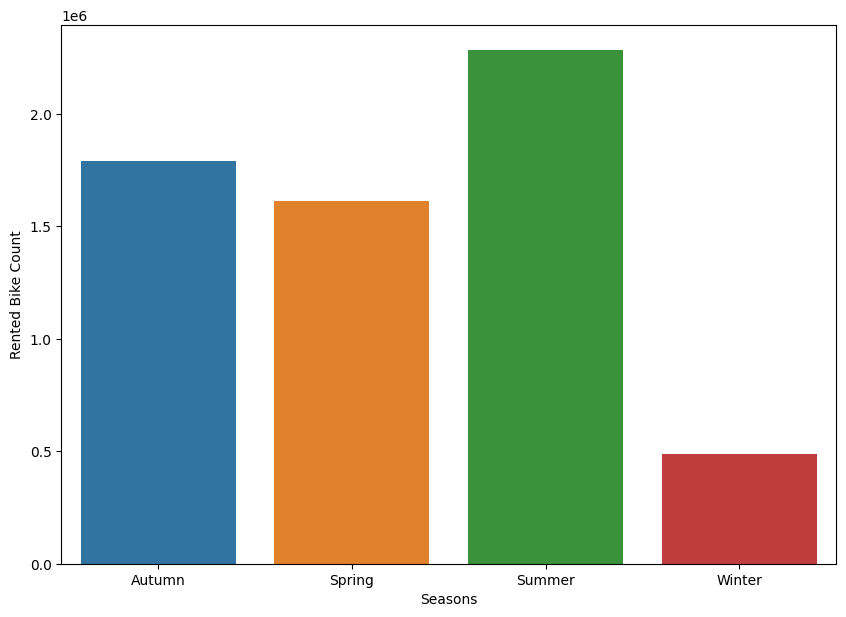

In [ ]:
plt.figure(figsize=(10, 7))
splot = sns.barplot(data=seasons_col, x='Seasons', y='Rented Bike Count')

# Annotating each bar with the count

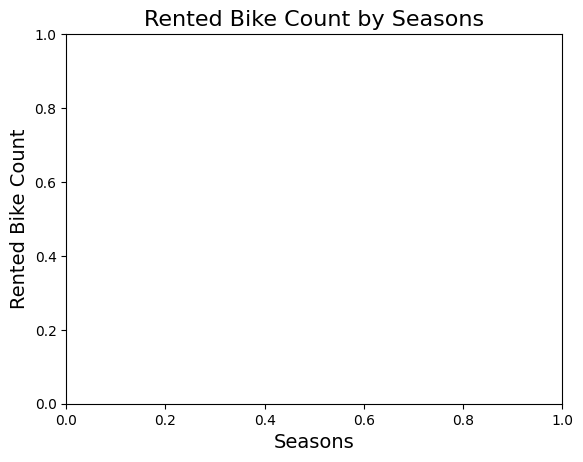

In [ ]:

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.title("Rented Bike Count by Seasons", size=16)
plt.show()


In [ ]:
# Initial preparations for plotting a pie chart with percentages
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented Bike Count'])
palette_color = sns.color_palette('bright')
explode = (0.05, 0.05, 0.05, 0.05)


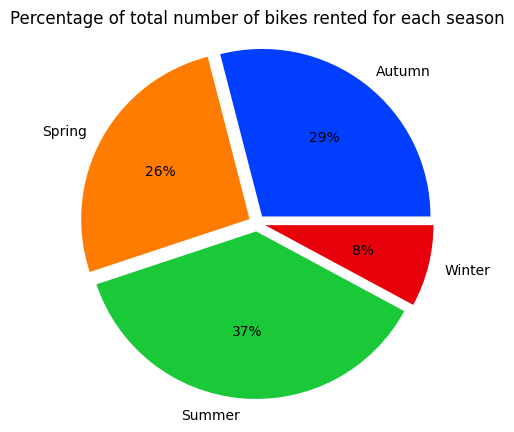

In [ ]:
# Creating the pie chart visualization for the Seasons column
plt.figure(figsize=(5, 5))
plt.pie(rented_count_list, labels=seasons_list, colors=palette_color, explode=explode, autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**Bicycle Rental Statistics**

• Summer: Highest bike rental (37%), likely due to vacation mood and increased tourists.

• Winter: Lowest bike rental (8%).

In [ ]:
# Holidays column analysis
holidays_col = create_df_analysis('Holiday')
print(holidays_col)


      Holiday  Rented Bike Count
0     Holiday             215895
1  No Holiday            5956419


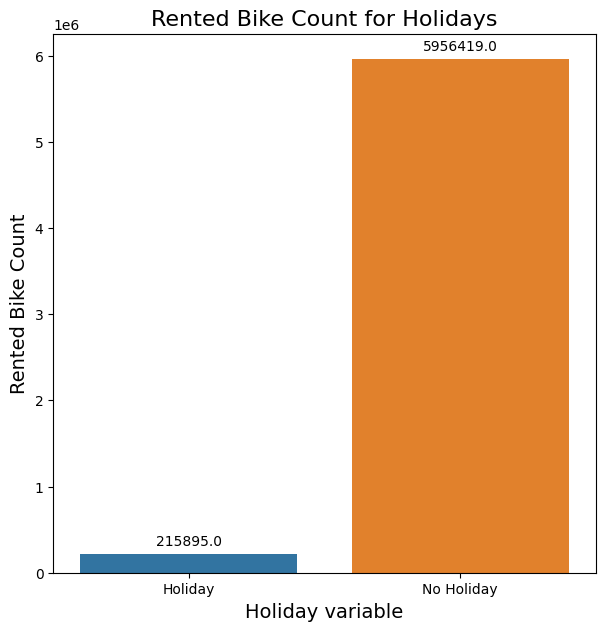

In [ ]:
# Creating a visualization for the Holidays column
plt.figure(figsize=(7, 7))
splot = sns.barplot(data=holidays_col, x='Holiday', y='Rented Bike Count')

# Annotating each bar with the count
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Holiday variable", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.title("Rented Bike Count for Holidays", size=16)
plt.show()


The majority of bikes rented are on non-holiday days, requiring analysis for varying temperatures.

In [ ]:
print(data.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(?)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(?)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


     Temperature(?)  Rented Bike Count
0             -17.8                322
1             -17.5                291
2             -17.4                 64
3             -16.9                 36
4             -16.5                 96
..              ...                ...
541            38.0               1184
542            38.7                475
543            39.0               1033
544            39.3                531
545            39.4                561

[546 rows x 2 columns]


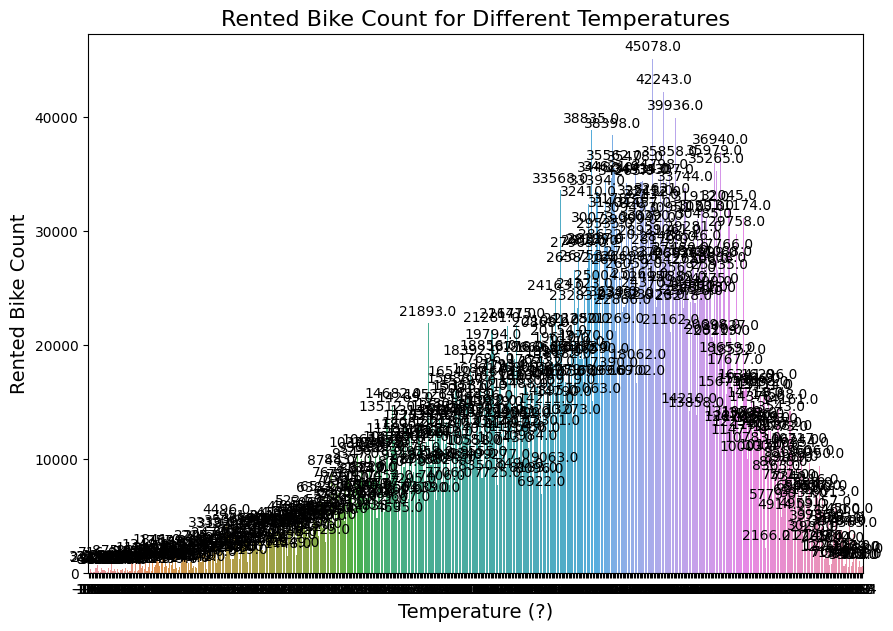

In [ ]:
# Execute the create_df_analysis function for Temperature
temp_bike = create_df_analysis('Temperature(?)')

# Display the resulting DataFrame
print(temp_bike)

# Creating a visualization for the Temperature vs. Rented Bike Count analysis
plt.figure(figsize=(10, 7))
splot = sns.barplot(data=temp_bike, x='Temperature(?)', y='Rented Bike Count')

# Annotating each bar with the count
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Temperature (?)", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.title("Rented Bike Count for Different Temperatures", size=16)
plt.show()


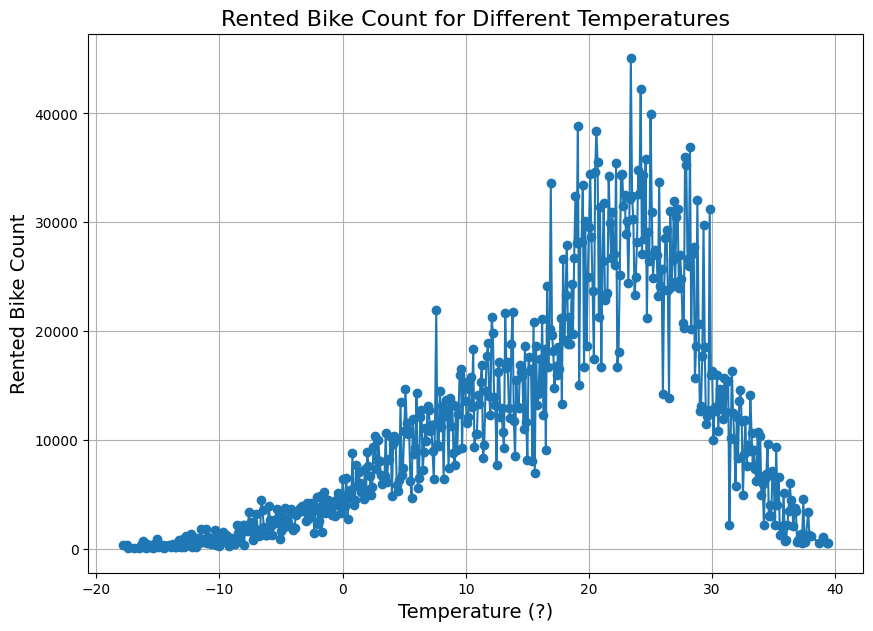

In [ ]:
# Creating a line plot for the Temperature vs. Rented Bike Count analysis
plt.figure(figsize=(10, 7))
plt.plot(temp_bike['Temperature(?)'], temp_bike['Rented Bike Count'], marker='o', linestyle='-')

plt.xlabel("Temperature (?)", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.title("Rented Bike Count for Different Temperatures", size=16)
plt.grid(True)
plt.show()


In [ ]:
# Display the list of columns in the dataframe
print(temp_bike.columns)


Index(['Temperature(?)', 'Rented Bike Count'], dtype='object')


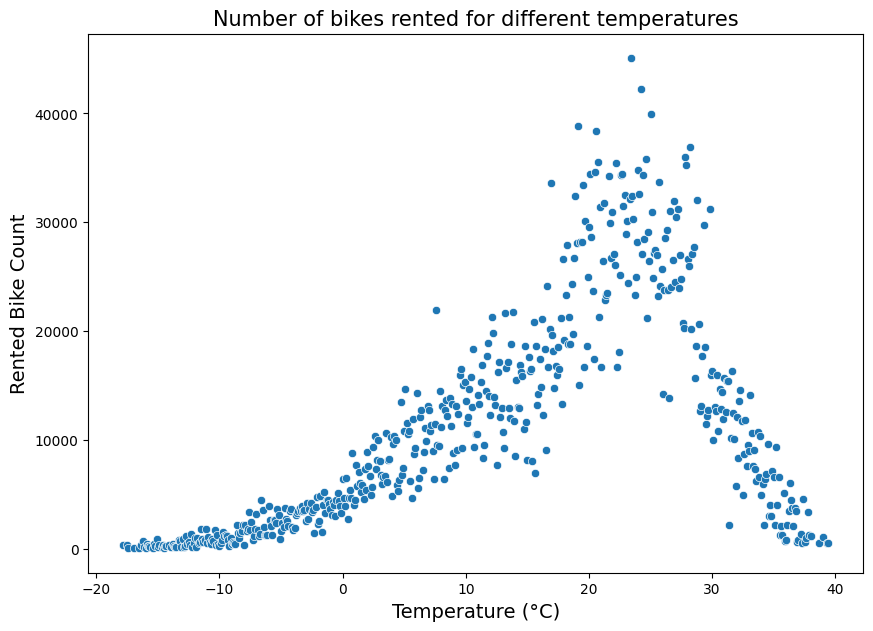

In [ ]:
# Creating a scatter plot for different temperatures and rented bike count
plt.figure(figsize=(10, 7))
sns.scatterplot(data=temp_bike, x='Temperature(?)', y='Rented Bike Count')
plt.title('Number of bikes rented for different temperatures', size=15)
plt.xlabel('Temperature (°C)', size=14)
plt.ylabel('Rented Bike Count', size=14)
plt.show()


As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.

Analysing for different intensities of snowfal

In [ ]:
# Creating a dataframe to analyze the number of bikes rented for different intensities of snowfall
snowfall_bike = create_df_analysis('Snowfall (cm)')

# Displaying the first few rows of the resulting DataFrame
snowfall_bike.head()


,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


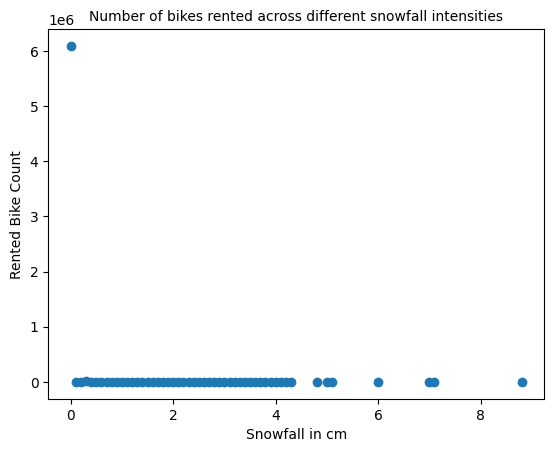

In [ ]:
# Creating a scatter plot for different snowfall intensities and rented bike count
plt.scatter(data=snowfall_bike, x='Snowfall (cm)', y='Rented Bike Count')
plt.title('Number of bikes rented across different snowfall intensities', size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented Bike Count')
plt.show()


Analysing for different intensities of rainfall

In [ ]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of rainfall
rainfall_bike = create_df_analysis('Rainfall(mm)')
rainfall_bike.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


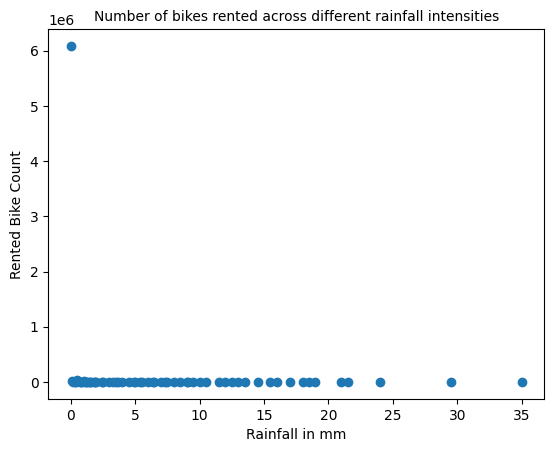

In [ ]:
#Creating a visualisation for different rainfall intensities
plt.scatter(data=rainfall_bike,x='Rainfall(mm)',y='Rented Bike Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented Bike Count')
plt.show()

Here, we can observe that the majority of the bikes are hired during the complete absence of snowfall. Rainfall yields a similar result: when there is no rainfall, the greatest number of bikes are leased.

Note: Because the y axis in both cases is of order 10 to the power 6, it is not very noticeable that the lower numbers are lower.

examining data for various amounts of humidity


In [ ]:
#Creating a dataframe for analysing the number of bikes rented for different humidity percentages.
humidity_bike = create_df_analysis('Humidity(%)')
humidity_bike


,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


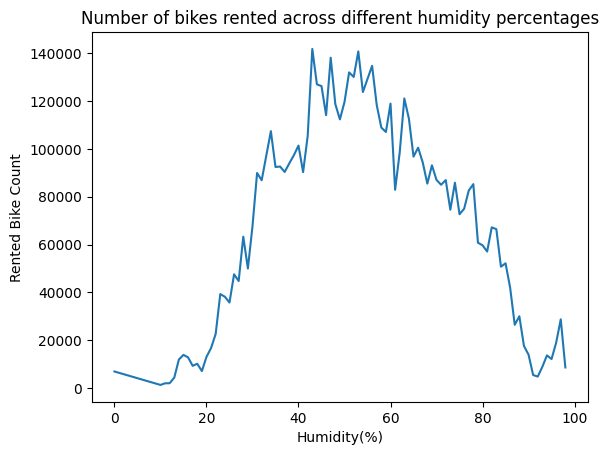

In [ ]:
#Plotting a visualisation for the different humidity percentages
plt.plot(humidity_bike['Humidity(%)'],humidity_bike['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()

It is evident that most of the bikes are hired at a humidity fraction between 30 and 70.


In [ ]:
#Creating a dataframe to analyse the number of bikes rented for different hours of the day
hour_df = create_df_analysis("Hour")
hour_df

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


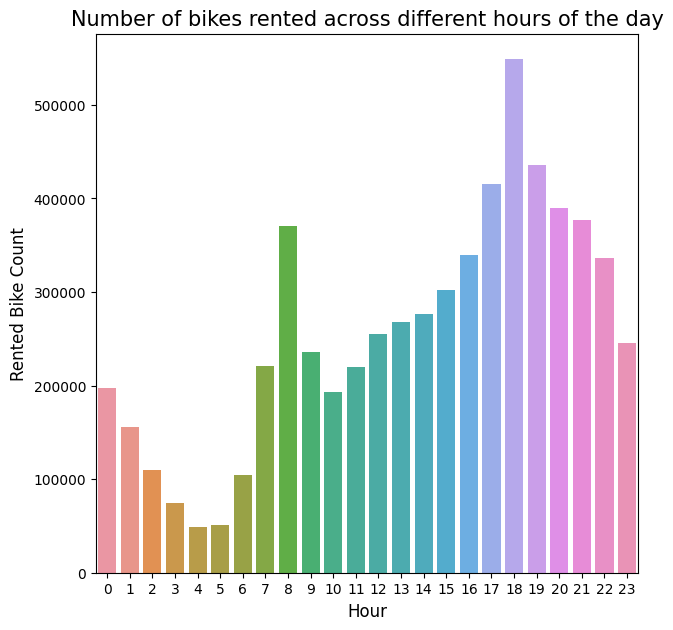

In [ ]:
#Creating a visualisation for different hours of the day
plt.figure(figsize=(7,7))
sns.barplot(data=hour_df,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=15)
plt.xlabel('Hour',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

This shows that the 18th hour, or 6 p.m., saw the most bike rentals, while the 4th hour, or 4 a.m., saw the fewest.

In [ ]:
#Creating a dataframe to analyse the number of bikes rented for different visibility rates
visibility_bike = create_df_analysis('Visibility (10m)')
visibility_bike

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


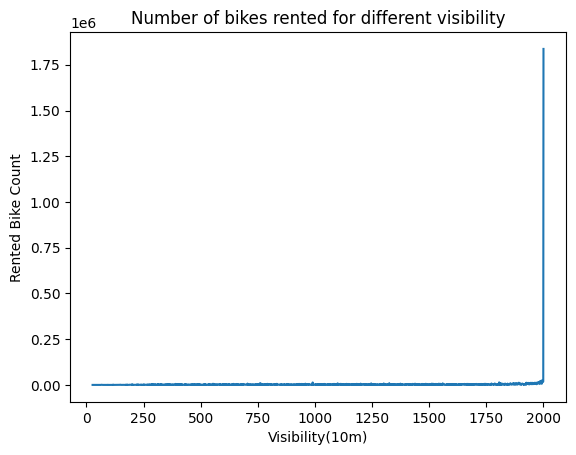

In [ ]:
#Creating a visualisation for number of bikes rented in different visibility ranges
plt.plot(visibility_bike['Visibility (10m)'],visibility_bike['Rented Bike Count'])
plt.xlabel('Visibility(10m)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bikes rented for different visibility')
plt.show()

We can see that higher visibility is preffered by the customers. Through further analysis of the visibility_bike dataframe we can see that for increasing visibility there is an increase in bikes rented

 **Clean Up:**
Managing null values: In a particular dataset, missing data refers to values or information that are either not stored in the dataset or are not available.

Missing values have the potential to skew machine learning model outcomes and/or lower model accuracy.

As a result, handling null values before training our model is crucial. Null values can be handled in two primary ways: either all the observations containing the null values are deleted, or the null values are imputed with some meaningful complete values.


In [ ]:
# Checking for null values in the data DataFrame
data.isnull().sum()


Date                        0
Rented Bike Count           0
Hour                        0
Temperature(?)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(?)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

As we can see there are no null values present in our dataset and therefore we are good to go.

Handling duplicate values:
When two features have the same set of values they are known as duplicate values.

Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.

The best way of dealing with duplicate values is to delete them.



In [ ]:
# Checking for duplicate values in the data DataFrame
data.duplicated().sum()


0


As we can see there are no duplicate values, so we can move ahead

**Eliminating anomalies:**
Data points that differ noticeably from the remainder of the dataset's data points are known as outliers. These may bias the data and compromise the ML model's accuracy.


In [ ]:
# Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(data.describe().columns) - {'Rented Bike Count', 'Hour'})


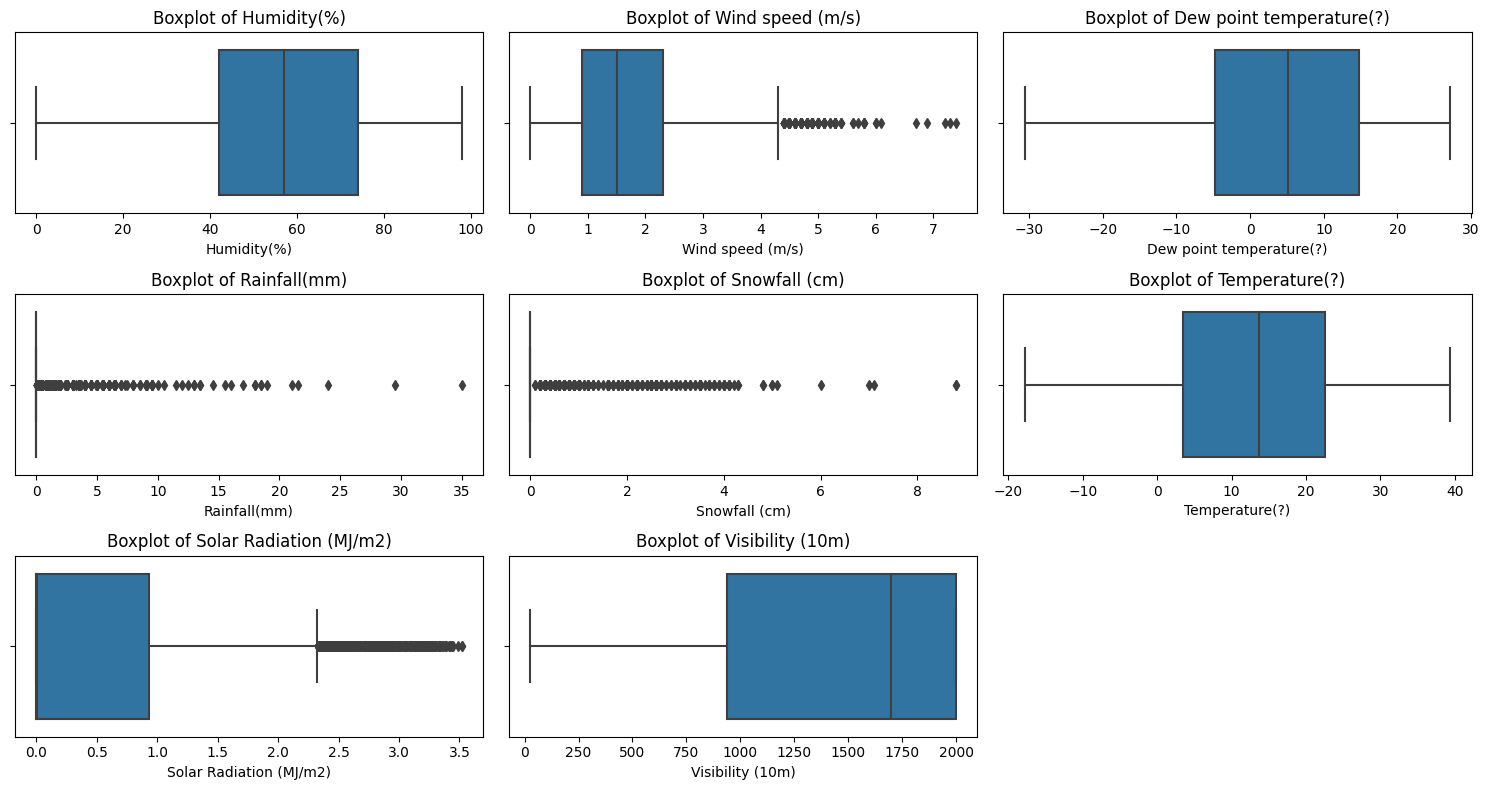

In [ ]:
# Creating box plots for columns that can possibly contain outliers
plt.figure(figsize=(15, 8))

num_cols = len(possible_outlier_cols)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

for i, column in enumerate(possible_outlier_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


As we can see, the columns with outliers in them are Windspeed, Solar Radiation, Rainfall, and Snowfall.


In [ ]:
# Assuming 'outlier_cols' is the list of columns with possible outliers
Q1 = data[outlier_cols].quantile(0.25)
Q3 = data[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Displaying the calculated inter-quartile range
IQR


Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [ ]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [ ]:
# Assuming 'outlier_cols' is the list of columns with possible outliers
for column in outlier_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    l_fence = Q1 - 1.5 * IQR
    u_fence = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[~((data[column] < l_fence) | (data[column] > u_fence))]

# Checking the number of outliers deleted
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7312 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      7312 non-null   object 
 1   Rented Bike Count         7312 non-null   int64  
 2   Hour                      7312 non-null   int64  
 3   Temperature(?)            7312 non-null   float64
 4   Humidity(%)               7312 non-null   int64  
 5   Wind speed (m/s)          7312 non-null   float64
 6   Visibility (10m)          7312 non-null   int64  
 7   Dew point temperature(?)  7312 non-null   float64
 8   Solar Radiation (MJ/m2)   7312 non-null   float64
 9   Rainfall(mm)              7312 non-null   float64
 10  Snowfall (cm)             7312 non-null   float64
 11  Seasons                   7312 non-null   object 
 12  Holiday                   7312 non-null   object 
 13  Functioning Day           7312 non-null   object 
dtypes: float

Some null values have been created in these 4 columns as a result of outlier deletion.At this point, we have the option to either impute meaningful full values or delete the observations that have null values. I'll be imputing the median value of each column to them in this instance.

Keep in mind that The mean is typically used to impute null values, but since the median is less affected by outliers than the mean, I'll go with the latter.


In [ ]:
def impute_null(columns):
    for column in columns:
        # Your imputation logic here (e.g., filling null values with mean, median, or any other strategy)
        data[column].fillna(data[column].mean(), inplace=True)


In [ ]:
# Checking if the imputation is successful
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7312 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      7312 non-null   object 
 1   Rented Bike Count         7312 non-null   int64  
 2   Hour                      7312 non-null   int64  
 3   Temperature(?)            7312 non-null   float64
 4   Humidity(%)               7312 non-null   int64  
 5   Wind speed (m/s)          7312 non-null   float64
 6   Visibility (10m)          7312 non-null   int64  
 7   Dew point temperature(?)  7312 non-null   float64
 8   Solar Radiation (MJ/m2)   7312 non-null   float64
 9   Rainfall(mm)              7312 non-null   float64
 10  Snowfall (cm)             7312 non-null   float64
 11  Seasons                   7312 non-null   object 
 12  Holiday                   7312 non-null   object 
 13  Functioning Day           7312 non-null   object 
dtypes: float

In [ ]:
# Checking for null values after imputation
data.isnull().sum()


Date                        0
Rented Bike Count           0
Hour                        0
Temperature(?)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(?)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

The imputation is successful and therefore we have handled the outliers successfully

4.Feature Engineering: Encoding Features: Since machine learning models are limited to numerical values, it is necessary to translate or encode significant categorical columns into numerical variables. Feature encoding is the term for this procedure.

The Seasons, Holiday, and Functioning Day columns are the three that need to be encoded in this instance.


In [ ]:
# Encoding for the Seasons column using get_dummies
data = pd.get_dummies(data, columns=['Seasons'], prefix='', prefix_sep='')

# Optional: Drop the original 'Seasons' column if needed
# data.drop('Seasons', axis=1, inplace=True)


In [ ]:
print(data.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(?)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(?)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')


In [ ]:
print(data.head())


        Date  Rented Bike Count  Hour  Temperature(?)  Humidity(%)  \
0  1/12/2017                254     0            -5.2           37   
1  1/12/2017                204     1            -5.5           38   
2  1/12/2017                173     2            -6.0           39   
3  1/12/2017                107     3            -6.2           40   
4  1/12/2017                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(?)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)     Holiday  \
0                      0.0           0.0            0.0  No Holiday   
1                      0.0        

In [ ]:
# Display the list of columns in the dataframe
print(data.columns)

# Removing 'Seasons' column if present
if 'Seasons' in data.columns:
    data.drop(columns=['Seasons'], axis=1, inplace=True)

# Encoding for 'Holiday' column
data['Holiday'] = np.where(data['Holiday'] == 'Holiday', 1, 0)

# Encoding for 'Functioning Day'
data['Functioning Day'] = np.where(data['Functioning Day'] == 'Yes', 1, 0)

# Displaying the modified DataFrame
data.head()


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(?)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(?)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')


,Date,Rented Bike Count,Hour,Temperature(?),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


**Checking correlation for feature removal:**

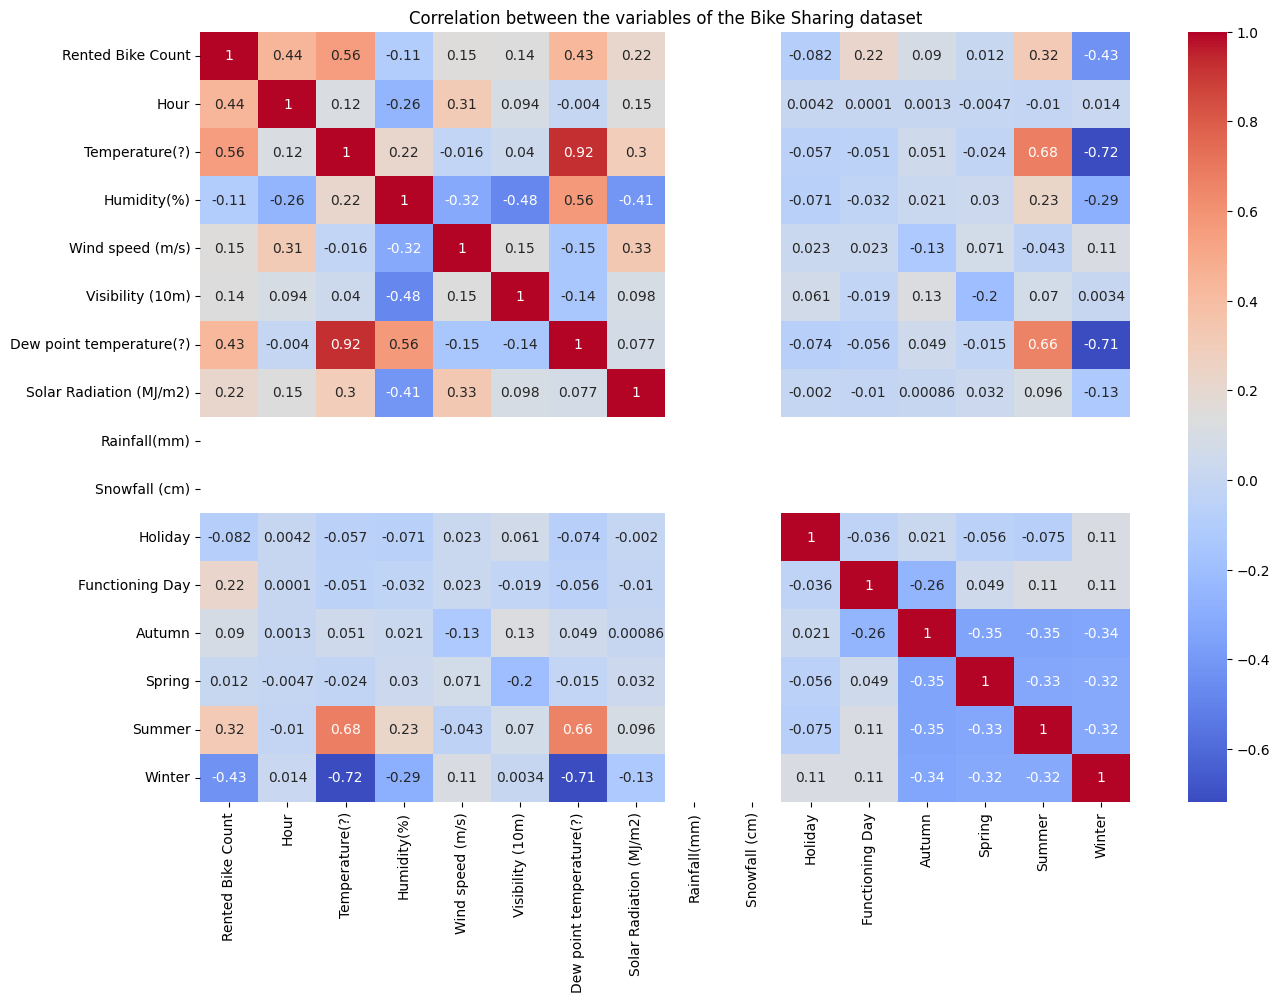

In [ ]:
# Assuming data is the DataFrame containing your data
corr_matrix = data.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between the variables of the Bike Sharing dataset')
plt.show()


We will drop the dew point temperature column since it has a strong correlation with the temperature column and can be removed without significantly affecting our model construction.


I will also remove the date column because I don't think it adds any value.



In [ ]:
# Assuming your DataFrame is named 'data'
columns_to_drop = ['Dew point temperature(?)', 'Date']

# Check if the columns exist before dropping them
for column in columns_to_drop:
    if column in data.columns:
        data.drop(columns=column, axis=1, inplace=True)

# Displaying the modified DataFrame
print(data.columns)


Index(['Rented Bike Count', 'Hour', 'Temperature(?)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Autumn',
       'Spring', 'Summer', 'Winter'],
      dtype='object')


**Removing Multicollinearity:**

Two independent variables that have a strong correlation with one another are said to be multicollinear.


Regression model accuracy is impacted by multicollinearity, thus we will determine whether multicollinearity exists in our dataset and address it by eliminating the contributing columns.

Note: I'll use the variance inflation factor to determine whether our dataset is multicollinear. Less than ten is the accepted VIF.


In [36]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming bike_sharing_df is your DataFrame, you should load it before using calc_vif
bike_sharing_df = pd.read_csv('/content/SeoulBikeData.csv')  # Replace 'your_dataset.csv' with your actual file path

# Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns) - {'Rented Bike Count'})

# Creating a function to calculate the variance inflation factor (VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Converting DataFrame to numeric
bike_sharing_df_numeric = bike_sharing_df.apply(pd.to_numeric, errors='coerce')

# Handling missing values and infinity
bike_sharing_df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
bike_sharing_df_numeric.dropna(inplace=True)

# Check if there are still rows left after handling missing values
if bike_sharing_df_numeric.shape[0] == 0:
    print("No data left after handling missing values. Please check your input data.")
else:
    # Calculating the VIF for independent columns
    vif_result = calc_vif(bike_sharing_df_numeric[idv_cols])

    # Displaying the VIF results
    print(vif_result)


No data left after handling missing values. Please check your input data.


Index(['Rented Bike Count', 'Hour', 'Temperature(?)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day'],
      dtype='object')
   Rented Bike Count  Hour  Temperature(?)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   
3                107     3            -6.2           40               0.9   
4                 78     4            -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            

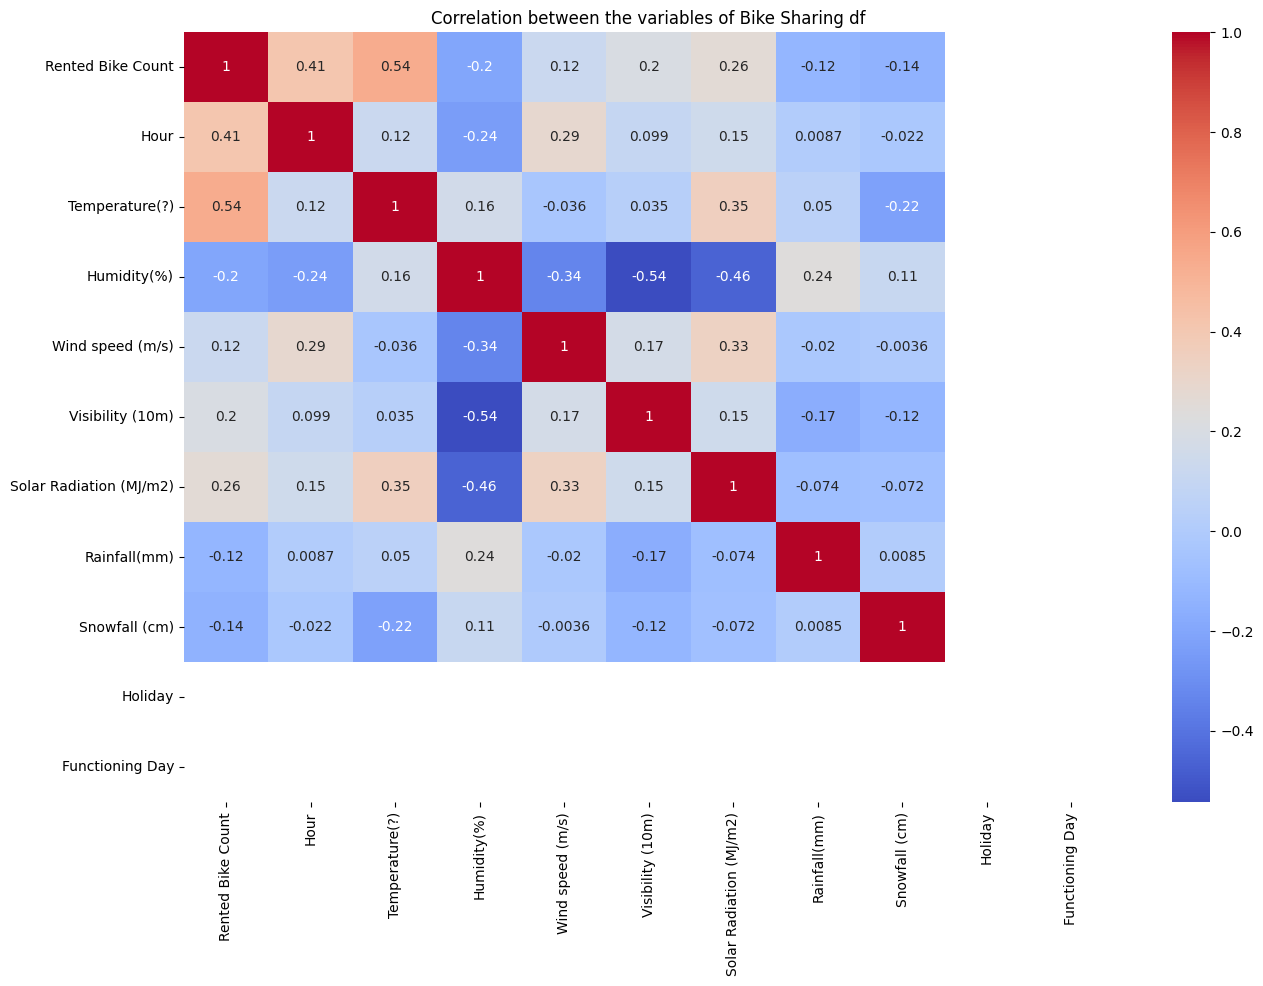

KeyError: ignored

In [41]:
# Assuming bike_sharing_df is the DataFrame containing your data
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Display the list of columns in the dataframe
print(bike_sharing_df.columns)

# Removing 'Seasons' column if present
if 'Seasons' in bike_sharing_df.columns:
    bike_sharing_df.drop(columns=['Seasons'], axis=1, inplace=True)

# Encoding for 'Holiday' column
bike_sharing_df['Holiday'] = np.where(bike_sharing_df['Holiday'] == 'Holiday', 1, 0)

# Encoding for 'Functioning Day'
bike_sharing_df['Functioning Day'] = np.where(bike_sharing_df['Functioning Day'] == 'Yes', 1, 0)

# Displaying the modified DataFrame
print(bike_sharing_df.head())

# Plotting correlation matrix using sns.heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = bike_sharing_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

# Removing unnecessary columns
columns_to_drop = ['Dew point temperature(?)', 'Date']
for column in columns_to_drop:
    if column in bike_sharing_df.columns:
        bike_sharing_df.drop(columns=column, axis=1, inplace=True)

# Encoding for Seasons column
bike_sharing_df['Winter'] = np.where(bike_sharing_df['Seasons'] == 'Winter', 1, 0)
bike_sharing_df['Spring'] = np.where(bike_sharing_df['Seasons'] == 'Spring', 1, 0)
bike_sharing_df['Summer'] = np.where(bike_sharing_df['Seasons'] == 'Summer', 1, 0)
bike_sharing_df['Autumn'] = np.where(bike_sharing_df['Seasons'] == 'Autumn', 1, 0)

# Removing Seasons column since we don't require it now.
bike_sharing_df.drop(columns=['Seasons'], axis=1, inplace=True)

# Encoding for Holiday column
bike_sharing_df['Holiday'] = np.where(bike_sharing_df['Holiday'] == 'Holiday', 1, 0)

# Encoding for Functioning day
bike_sharing_df['Functioning Day'] = np.where(bike_sharing_df['Functioning Day'] == 'Yes', 1, 0)

# Displaying the modified DataFrame
print(bike_sharing_df.head())

# Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns) - {'Rented Bike Count'})

# Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculating the VIF for independent columns
vif_result = calc_vif(bike_sharing_df[idv_cols])
print(vif_result)


In [39]:
# Continue with VIF calculation if there is data left
if bike_sharing_df_numeric.shape[0] > 0:
    # Creating a list of independent columns
    idv_cols = list(set(bike_sharing_df_numeric.columns) - {'Rented Bike Count'})

    # Creating a function to calculate the variance inflation factor(VIF)
    def calc_vif(X):
        vif = pd.DataFrame()
        vif["Columns"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        return vif

    # Calculating the VIF for independent columns
    vif_result = calc_vif(bike_sharing_df_numeric[idv_cols])

    # Displaying the VIF results
    print("VIF Results:")
    print(vif_result)
else:
    print("No data left after handling missing values. Please check your input data.")


No data left after handling missing values. Please check your input data.


In [43]:
#Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})
#Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
#Calculating the VIF for independent columns
calc_vif(bike_sharing_df[idv_cols])

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Columns,VIF
0,Visibility (10m),4.710170
1,Hour,3.921832
2,Temperature(?),3.228318
3,Functioning Day,NaN
4,Wind speed (m/s),4.608625
5,Solar Radiation (MJ/m2),2.246791
6,Snowfall (cm),1.120579
7,Rainfall(mm),1.079158
8,Holiday,NaN
9,Humidity(%),4.868221


We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented. The columns Rainfall and Snowfall have no VIF at all so we will drop them too.

In [46]:
# Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns) - {'Rented Bike Count'})

# Creating a function to calculate the variance inflation factor(VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [47]:
# Dropping the unnecessary columns
columns_to_drop = {'Winter', 'Rainfall(mm)', 'Snowfall (cm)'}
columns_to_drop = {col for col in columns_to_drop if col in bike_sharing_df.columns}
bike_sharing_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Creating a list of remaining independent columns
idv_cols = list(set(bike_sharing_df.columns) - {'Rented Bike Count'})

# Calculating VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Columns,VIF
0,Visibility (10m),4.565815
1,Hour,3.913717
2,Temperature(?),3.024588
3,Functioning Day,NaN
4,Wind speed (m/s),4.605447
5,Solar Radiation (MJ/m2),2.226936
6,Holiday,NaN
7,Humidity(%),4.415913


In [48]:
# Dropping the Functioning Day column
bike_sharing_df.drop(columns={'Functioning Day'}, axis=1, inplace=True)

# Creating a list with remaining independent columns
idv_cols = list(set(bike_sharing_df.columns) - {'Rented Bike Count'})

# Calculating the VIF for remaining independent columns
calc_vif(bike_sharing_df[idv_cols])


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Columns,VIF
0,Visibility (10m),4.565815
1,Hour,3.913717
2,Temperature(?),3.024588
3,Wind speed (m/s),4.605447
4,Solar Radiation (MJ/m2),2.226936
5,Holiday,NaN
6,Humidity(%),4.415913


Now that we don't have any variable with VIF>10 we can move ahead.

**Obtaining correlation between independent and dependent variables:**



To determine this link, a regression plot will be utilized. This ascertains whether there is a linear relationship between the independent and dependent variables, which is a prerequisite for models such as linear regression.


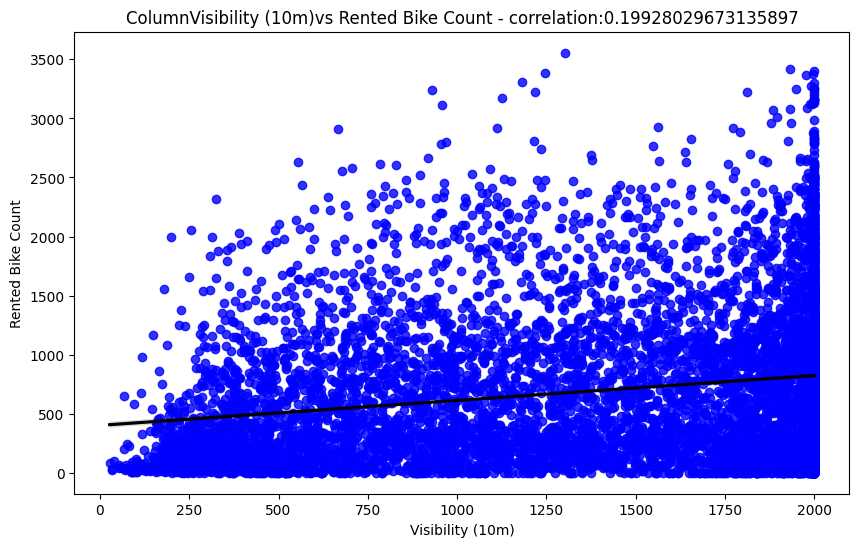

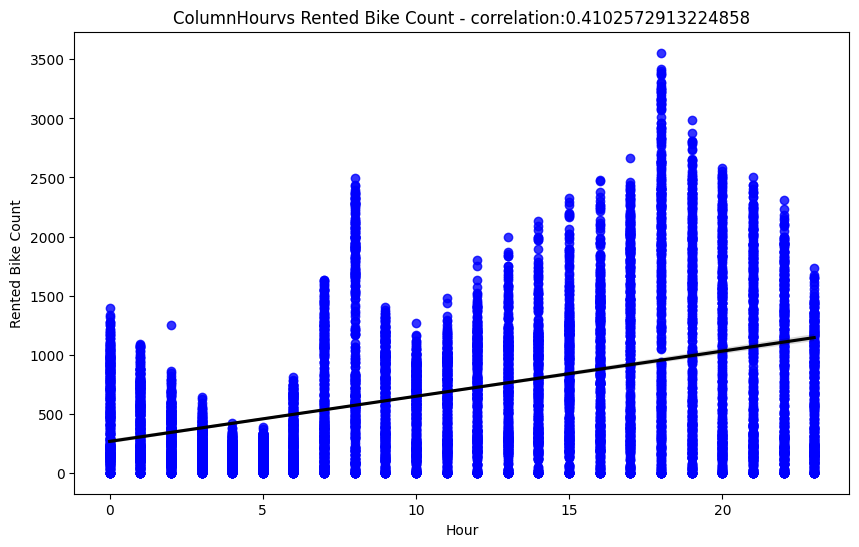

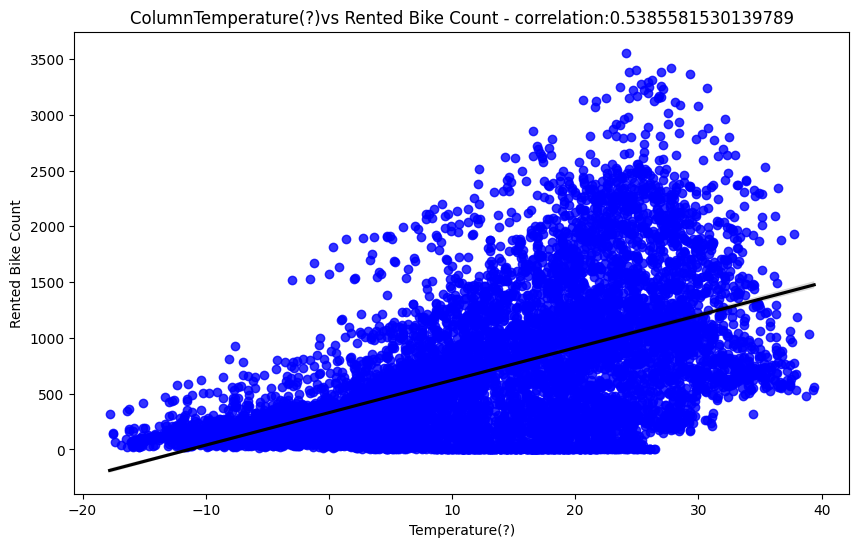

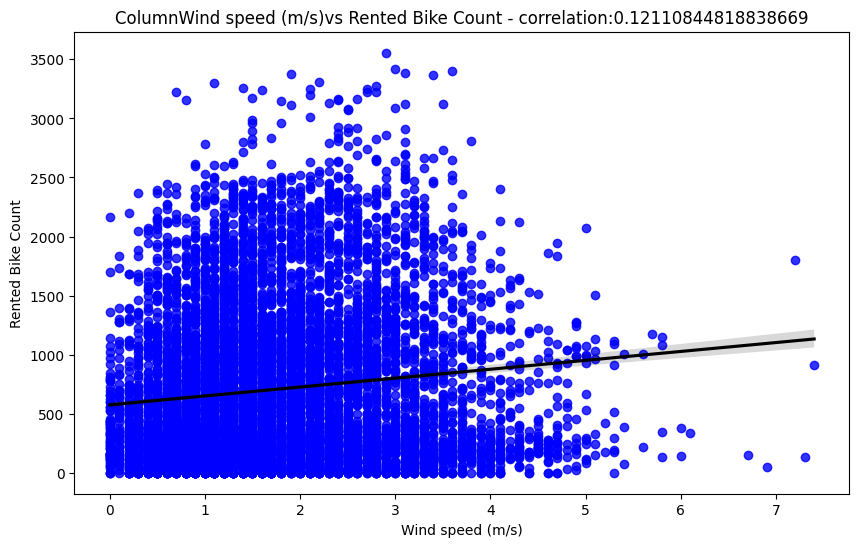

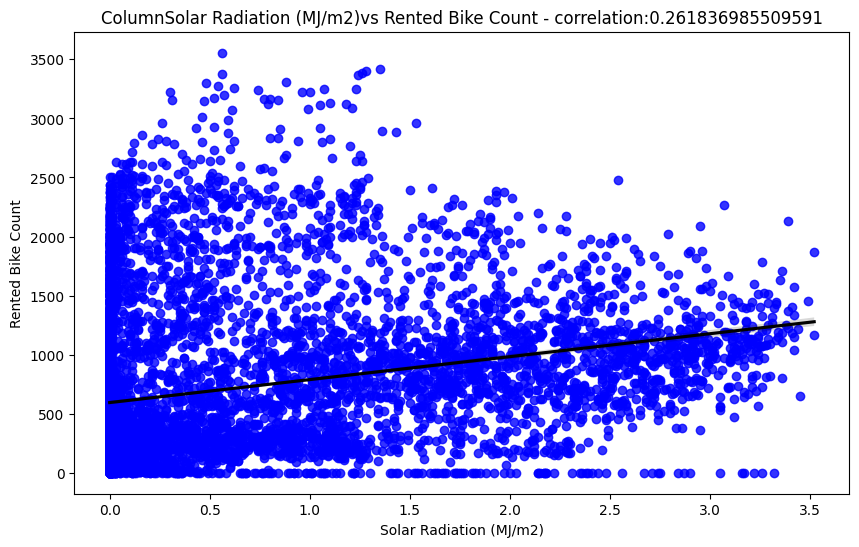

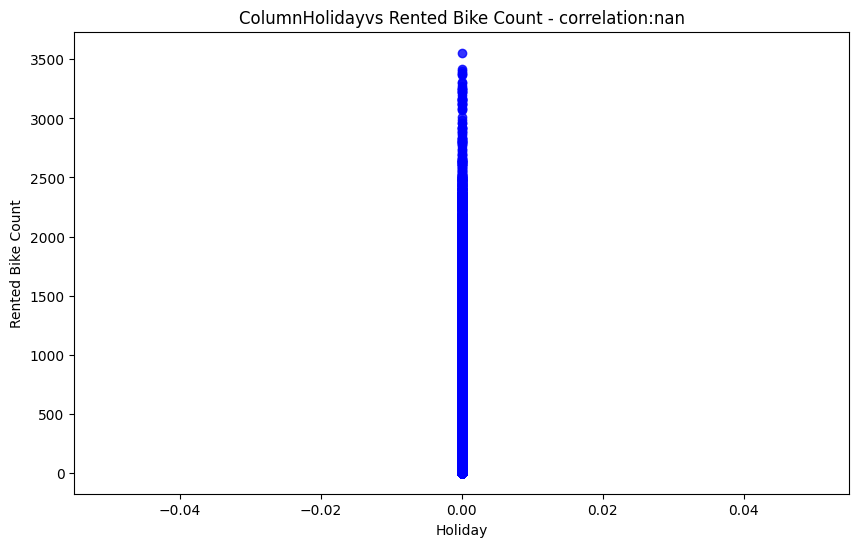

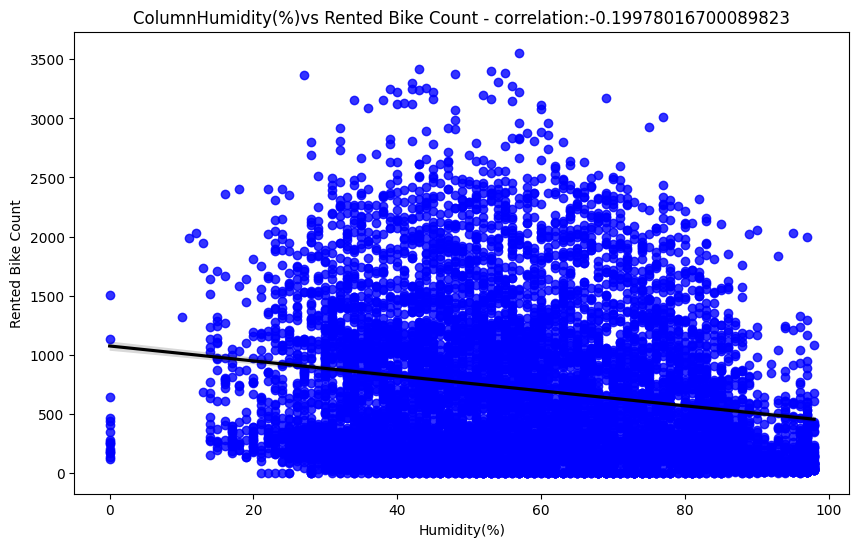

In [49]:
#printing the regression plot for all the numerical features
for col in idv_cols:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_sharing_df[col],y=bike_sharing_df['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})
  corr=bike_sharing_df[col].corr(bike_sharing_df['Rented Bike Count'])
  ax.set_title('Column'+ col+'vs Rented Bike Count - correlation:'+str(corr))


As you can see, the dependent variable and every other column we have have a linear connection. We are consequently set to proceed as we have met the supposition.


**Pre-processing of the data:**

In [50]:
#Creating the dataset for independent and dependent variables
X = bike_sharing_df.drop(columns={'Rented Bike Count'},axis=1)
Y = bike_sharing_df['Rented Bike Count']


In [51]:
#First look of the independent variable dataset
X.head()

,Hour,Temperature(?),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday
0,0,-5.2,37,2.2,2000,0.0,0
1,1,-5.5,38,0.8,2000,0.0,0
2,2,-6.0,39,1.0,2000,0.0,0
3,3,-6.2,40,0.9,2000,0.0,0
4,4,-6.0,36,2.3,2000,0.0,0


In [52]:
#First look of the dependent variable dataset
Y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

**Target feature conditioning:**

The distribution of the target feature is observed and in this case because it is a positively skewed distribution it is normalised using square root transformation.

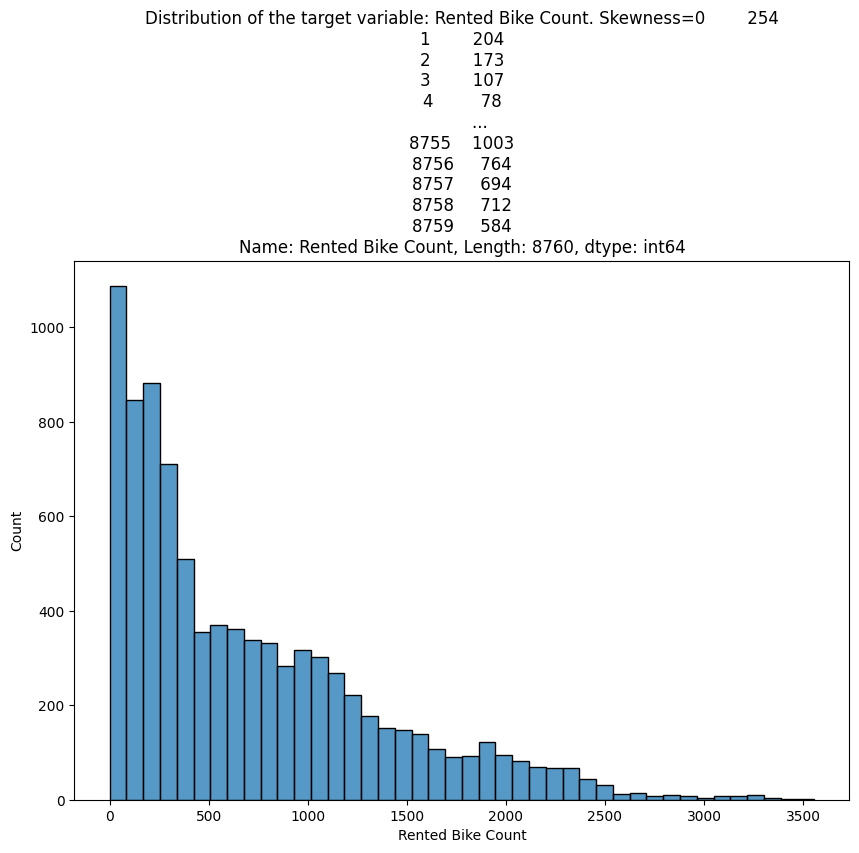

In [55]:
# Checking for the distribution of the Target variable
plt.figure(figsize=(10, 7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness=" + str((bike_sharing_df['Rented Bike Count'])))
sns.histplot(data=bike_sharing_df, x='Rented Bike Count')
plt.show()



In [56]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

In [57]:
#Creating a dataframe with values of Y for visualisation purposes
vis_Y = Y.reset_index()

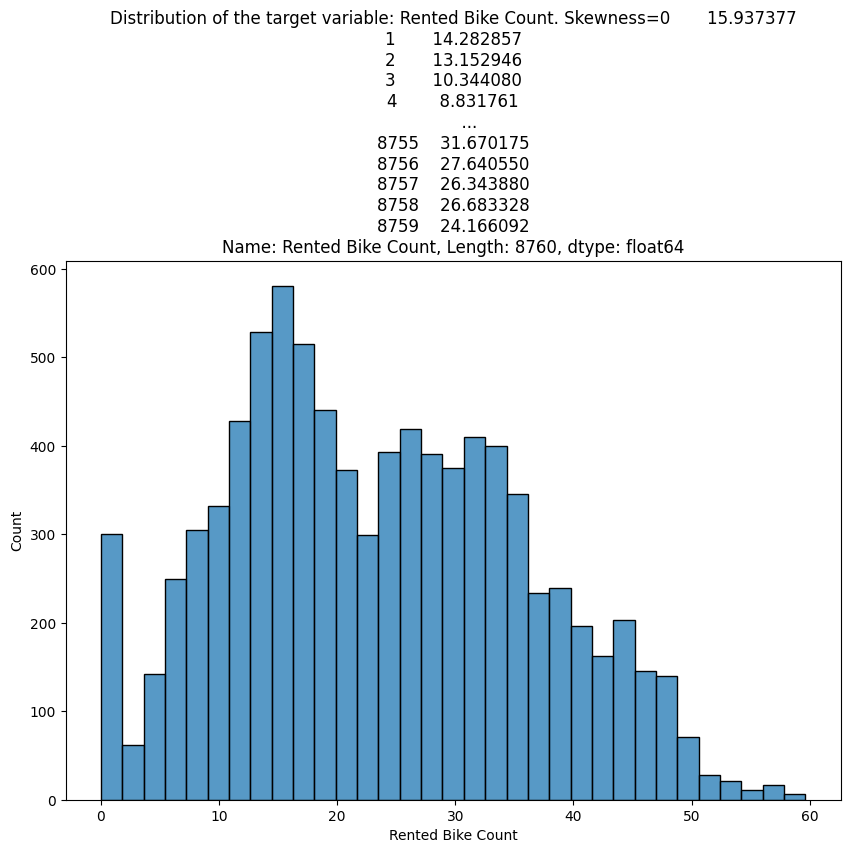

In [59]:
#Checking how well the square root transformation has worked
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str((vis_Y['Rented Bike Count'])))
sns.histplot(data=vis_Y,x='Rented Bike Count')
plt.show()


**Creating the test and train dataset:**

**We can see that the target variable has been normalised and we are good to go.**

In [62]:
from sklearn.model_selection import train_test_split


In [63]:
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [64]:
#Shape of the train set of the independent values
X_train.shape

(6570, 7)

In [65]:
#Shape of the test set of the independent values
X_test.shape

(2190, 7)

**Feature Scaling:**
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Two ways of feature scaling:

Min max normalization

Standardisation

In this project I'm going to use the standardisation method with the help of the StandardScaler() function.

In [67]:
from sklearn.preprocessing import StandardScaler


In [68]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [69]:
#Creating object for the StandardScaler function
scaler = StandardScaler()
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [70]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -1.72479535,
        -0.65549033,  0.        ],
       [ 0.36544652,  0.93615918, -0.54181953, ..., -1.51110252,
         2.63117329,  0.        ],
       [ 1.08889586, -1.65916064, -1.22968527, ...,  0.73595975,
        -0.65549033,  0.        ],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.81577894,
         2.79149834,  0.        ],
       [-1.66021162, -0.37401835,  0.04777967, ...,  0.77705452,
        -0.65549033,  0.        ],
       [ 1.23358573, -0.47415931,  1.22697808, ..., -2.03218426,
        -0.65549033,  0.        ]])

#**Model Implementation**
Programs that are trained to identify patterns or trends in data and forecast the outcome for fresh data are known as machine learning models.

Regression models will be utilized in this project since it involves a regression problem. Polynomial and linear regression are two common examples.

The following models will be included in this project:


**Linear regression**
Ridge regression refers to L2 regularized linear regression.

L1 regularization in linear regression is known as Lasso regression.
regression using random forests.




#**Regression using a linear model:**

As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

Programs that are trained to identify patterns or trends in data and forecast the outcome for fresh data are known as machine learning models.

Regression models will be utilized in this project since it involves a regression problem. Polynomial and linear regression are two common examples.

The following models will be included in this project:

Regression in line.
Ridge regression refers to L2 regularized linear regression.
L1 regularization in linear regression is known as Lasso regression.
Regression with random forests



#Linear regression:
As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [72]:
from sklearn.linear_model import LinearRegression


In [73]:
#Training the linear regression model
lr_model = LinearRegression().fit(X_train,Y_train)

In [74]:
#Checking the score of the linear regression model
lr_model.score(X_train,Y_train)

0.4632399769778054

In [75]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 3.30392133,  7.13055015, -3.41114911, -0.18386234,  0.20650967,
       -0.77471715,  0.        ])

In [76]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

In [77]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model)
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()


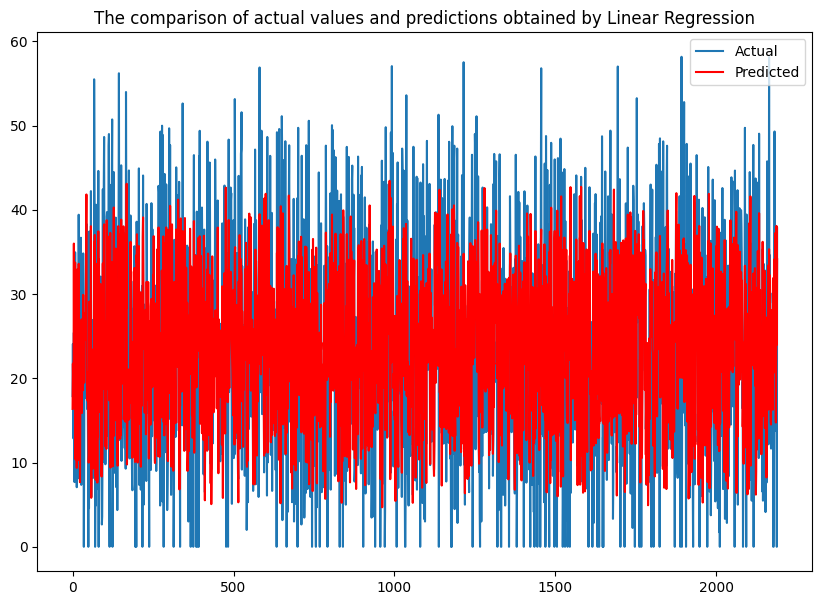

In [78]:

#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [79]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2_test = r2_score(Y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)

  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [81]:
from sklearn.metrics import mean_squared_error


In [83]:
from sklearn.metrics import r2_score


In [84]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 88.0277239011695
RMSE : 9.382309092178188
R2 : 0.4427440136818661
Adjusted R2 : 0.44095629970192707


#Ridge Regression:
Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [86]:
from sklearn.linear_model import Ridge


In [88]:
from sklearn.model_selection import GridSearchCV


In [89]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,Y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [90]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')


The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 10}

Using {'alpha': 10} as the value for aplha gives us a negative mean squared error of: -82.7591953152327


In [91]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=35).fit(X_train,Y_train)

In [92]:
#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

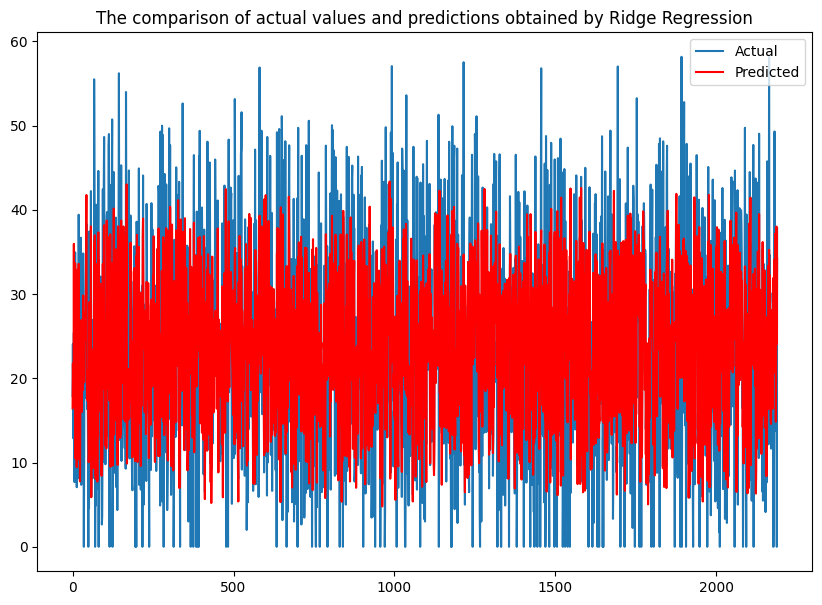

In [93]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')


In [94]:
#Calculating the evaluation metrics for Ridge Regression
eval_metrics(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 88.04280628581408
RMSE : 9.383112824953885
R2 : 0.4426485352489512
Adjusted R2 : 0.44086051496789835


As far as we observe, there is not much of a difference between the outcomes obtained with Ridge regression and Linear regression.


#**Lasso Regression:**
Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [98]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV



In [97]:
#Creating a Lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [99]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {lasso_model_grid.best_params_}')
print(f'\nUsing {lasso_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')


The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 0.8}

Using {'alpha': 0.8} as the value for aplha gives us a negative mean squared error of: -85.06665018473817


In [100]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.8).fit(X_train,Y_train)

In [101]:
#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)


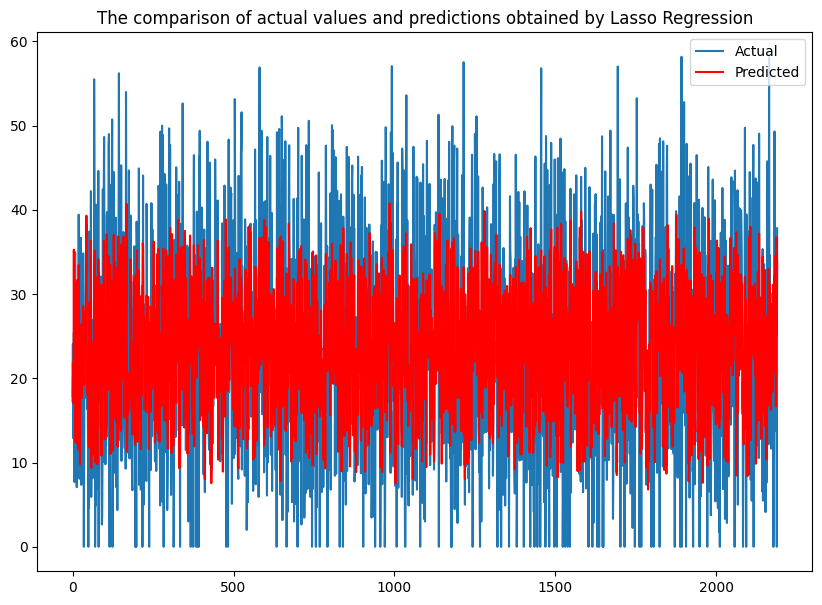

In [102]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')


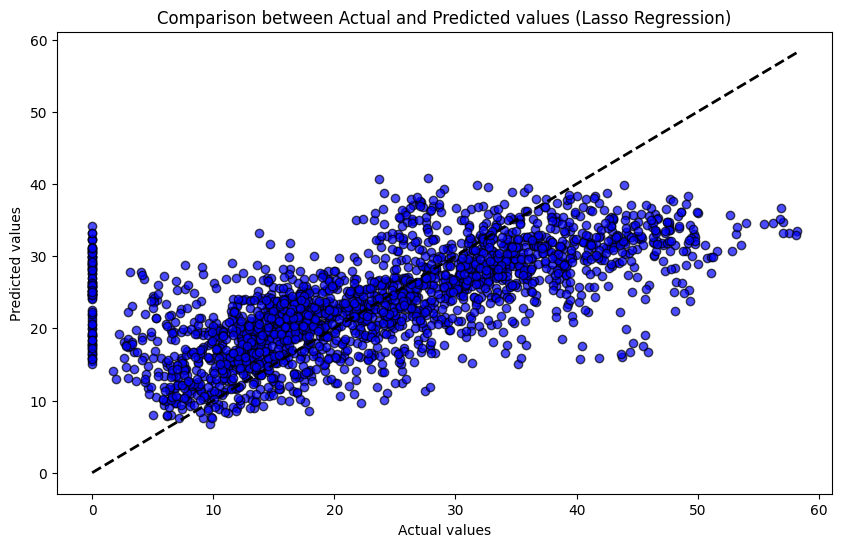

In [103]:
import matplotlib.pyplot as plt

def plot_comparison(y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test, y_pred, color='blue', edgecolors=(0, 0, 0), alpha=0.7)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
    plt.title(f'Comparison between Actual and Predicted values ({model_name})')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()

# Assuming Y_test_pred_lasso is the predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso, 'Lasso Regression')


In [105]:
# Calculating the evaluation metrics for Lasso Regression
eval_metrics(Y_test_pred_lasso, 'Lasso Regression')


The evaluation metrics for Lasso Regression are given as:
MSE : 90.75026665941712
RMSE : 9.526293437608203
R2 : 0.42550906561318824
Adjusted R2 : 0.4236660607824332


The model quality has depreciated by using the lasso regression method.

#Random Forest Regression:
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [108]:
from sklearn.ensemble import RandomForestRegressor


In [109]:
#Creating a Random Forest Regression model using GridSearchCV
rand_forest = RandomForestRegressor()


parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)],
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
rf_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [110]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')


The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 17}

Using {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 17} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.6834149455970151


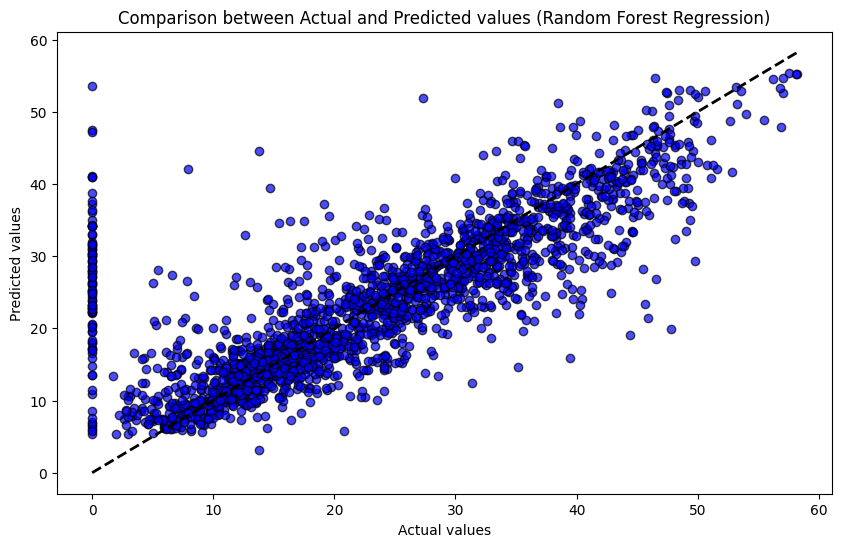

In [111]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [112]:
#Calculating the evaluation metrics for Random Forest Regression
eval_metrics(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 58.337211190422664
RMSE : 7.6378800193785885
R2 : 0.630698617205342
Adjusted R2 : 0.6295138739974765


As each of us are able to observe, there has been a significant improvement in model prediction quality.


#Model Explainability:
Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

LIME
SHAP
ELI-5
In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.



In [113]:
#Installing the shap library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.5 MB/s eta 0:00:00


In [114]:
#Initialising javascript for visualisation of SHAP
import shap

In [115]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

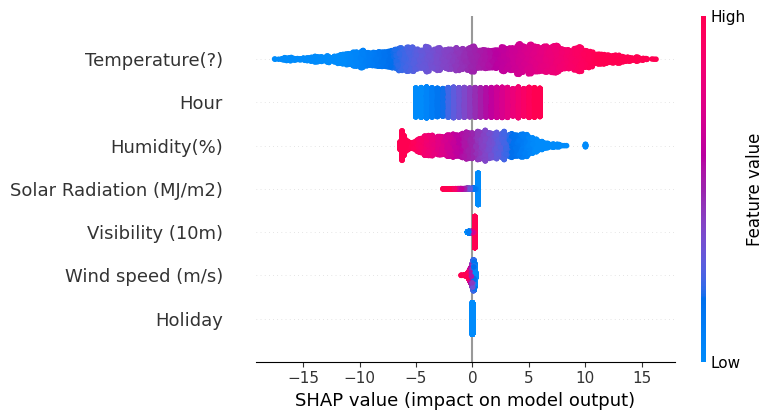

In [116]:
#Plotting shap summary plot for linear regression
shap_summary(lr_model)

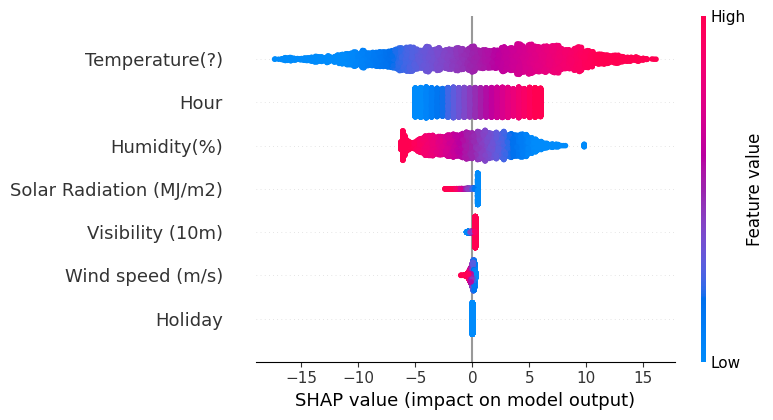

In [117]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge_model)


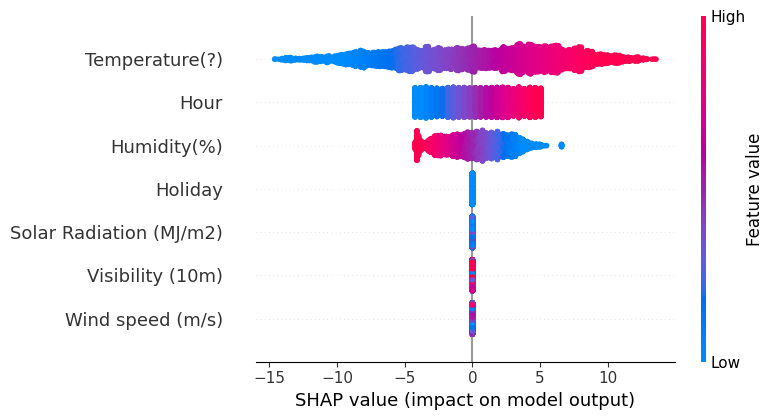

In [118]:
#Plotting shap summary plot for Lasso regression
shap_summary(lasso_model)

100%|===================| 6544/6570 [00:35<00:00]       

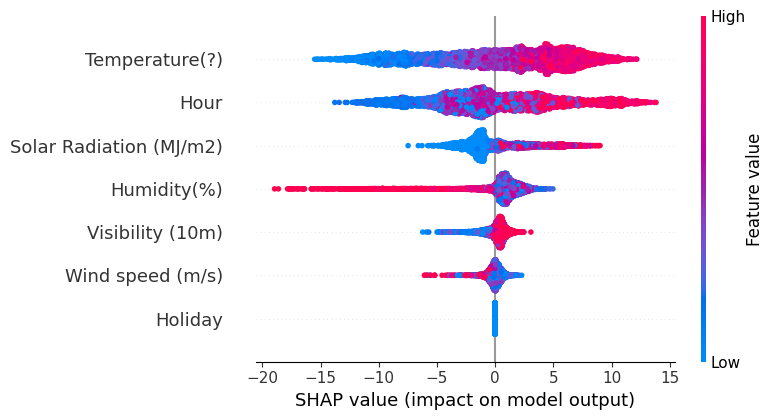

In [119]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)


We can observe that each model assigns a different weight or impact power to the features, which determines how well the model predicts. Random forest outperforms the other four models because it gives nearly all of the features a considerable influence power.

Understanding the SHAP values allows us to determine the feature relevance and impact power by examining the SHAP summary plot for each model.


#In conclusion

 EDA observations show that the summer months see the highest number of bike rentals, while the winter months see the lowest number.

On days that are not observed as holidays, more than 96% of the motorcycles are rented.
The majority of bikes that are hired are in the 15–30 degree temperature range.

The majority of motorcycles are leased in the absence of snow or rain.
The majority of the bikes are hired in the 30 to 70% humidity range.
The 18th hour, or 6 p.m., saw the most bike rentals, while the 4th hour, or 4 a.m., saw the fewest.
The majority of bike rentals have occurred during periods of high visibility.
Outcomes of machine learning models:
With a r2 score of 0.6645, Random Forest Regression is the best-performing model.


With a r2 score of 0.4264, Lasso Regression (L1 regularization) is the least effective model.

All four models have their Actual vs. Prediction visualization completed.
The SHAP library has been used to explain each of the four models.
Based on all the models, the two most significant elements are the hour and the temperature.

Obstacles encountered: Eliminating Outliers.
the categorical columns' encoding.
Removing the dataset's multicollinearity.
Selecting the Model Explainability Technique
